In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data_path='/content/train_data.txt'

In [ ]:
train = pd.read_csv(data_path, sep=":::", engine="python", names=["Title", "Genre", "Description"])
data.head()

,ID,Title,Description,Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [ ]:
data_path = '/content/test_data.txt'


In [ ]:
test = pd.read_csv(data_path, sep=":::", engine="python", names=["ID", "Title", "Description","Genre"])
data.head()

,ID,Title,Description,Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [ ]:
data.describe()

,ID,Genre
count,54200.000000,0.0
mean,27100.500000,NaN
std,15646.336632,NaN
min,1.000000,NaN
25%,13550.750000,NaN
50%,27100.500000,NaN
75%,40650.250000,NaN
max,54200.000000,NaN


In [ ]:
data.isnull().sum()

ID                 0
Title              0
Description        0
Genre          54200
dtype: int64

Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import re

Text(0, 0.5, 'Genre')

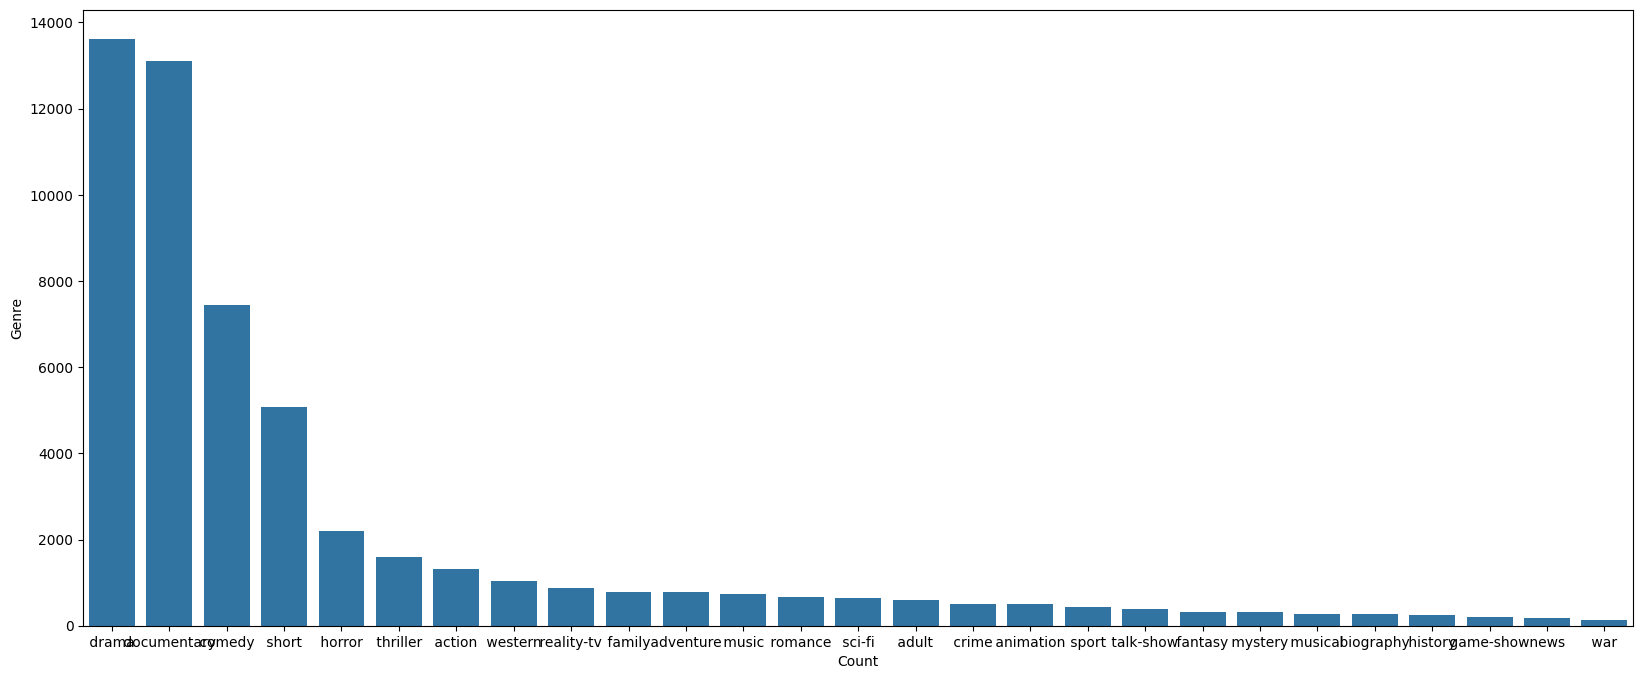

In [ ]:
plt.figure(figsize=(20,8))
counts=train.Genre.value_counts()
sns.barplot(x=counts.index,y=counts,orient='v')
plt.xlabel('Count')
plt.ylabel('Genre')

Data Preprocessing

In [ ]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()
    text = re.sub('-',' ',text.lower())
    text = re.sub(f'[{string.digits}]',' ',text)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    text =  re.sub(r'@\S+', '',text)
    text =  re.sub(r'http\S+', '',text)
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()
    return re.sub(f'[{re.escape(string.punctuation)}]','',text)

In [ ]:
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [ ]:
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data.Description.apply(clean_text)

train_data.head()

,Title,Genre,Description,Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,list convers doct parents year old osc learn n...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,broth sist past incestu rel cur murd relations...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty stud field trip muse nat history lit...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy fath mak end meet edi twin sist ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films titl ref recov body ground zero also sta...


In [ ]:
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
train_data.head()

,Title,Genre,Description,Text_cleaning,length_Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,broth sist past incestu rel cur murd relations...,83
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty stud field trip muse nat history lit...,325
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy fath mak end meet edi twin sist ...,616
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films titl ref recov body ground zero also sta...,282


In [ ]:
print('Dataframe size (before removal): ',len(train_data))
filt=train_data['length_Text_cleaning']>2000
train_data.drop(train_data[filt].index,axis=0,inplace=True)     # filter rows having cleaned description length > 2000
print('Dataframe size (after removal): ',len(train_data))
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54131
Dataframe size (after removal):  54131
Removed rows: 0


In [ ]:

from keras.preprocessing.text import Tokenizer

In [ ]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_cleaning'].values)

In [ ]:
test_path='/content/test_data_solution.txt'
test_data_solution=pd.read_csv( test_path , sep=':::',engine='python',names=['ID','Title','Genre','Description'])
test_data_solution.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
X = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [ ]:
# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.43585480742587973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       254
       adult        0.00      0.00      0.00       105
   adventure        0.00      0.00      0.00       134
   animation        0.00      0.00      0.00       101
   biography        0.00      0.00      0.00        45
      comedy        0.72      0.02      0.04      1505
       crime        0.00      0.00      0.00       116
 documentary        0.51      0.89      0.65      2605
       drama        0.38      0.86      0.53      2732
      family        0.00      0.00      0.00       158
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        48
     history        0.00      0.00      0.00        47
      horror        0.00      0.00      0.00       434
       music        0.00      0.00      0.00       145
     musical        0.00      0.00      0.00        57
     mystery        0.00      0.00      0.00        72
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Logistic Regression model
model = LogisticRegression()
classifier.fit(X_train, y_train)


# Predictions
y_pred = classifier.predict(X_val)

# Evaluation
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

print(f'Accuracy: {accuracy}')

Validation Accuracy: 0.43585480742587973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       254
       adult        0.00      0.00      0.00       105
   adventure        0.00      0.00      0.00       134
   animation        0.00      0.00      0.00       101
   biography        0.00      0.00      0.00        45
      comedy        0.72      0.02      0.04      1505
       crime        0.00      0.00      0.00       116
 documentary        0.51      0.89      0.65      2605
       drama        0.38      0.86      0.53      2732
      family        0.00      0.00      0.00       158
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        48
     history        0.00      0.00      0.00        47
      horror        0.00      0.00      0.00       434
       music        0.00      0.00      0.00       145
     musical        0.00      0.00      0.00        57
     mystery        0.00      0.00      0.00        72
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

In [ ]:
# Support Vector Machine model
model = SVC(kernel='linear')
classifier.fit(X_train, y_train)


# Predictions
y_pred = classifier.predict(X_val)

# Evaluation
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

print(f'Accuracy: {accuracy}')

Validation Accuracy: 0.43585480742587973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       254
       adult        0.00      0.00      0.00       105
   adventure        0.00      0.00      0.00       134
   animation        0.00      0.00      0.00       101
   biography        0.00      0.00      0.00        45
      comedy        0.72      0.02      0.04      1505
       crime        0.00      0.00      0.00       116
 documentary        0.51      0.89      0.65      2605
       drama        0.38      0.86      0.53      2732
      family        0.00      0.00      0.00       158
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        48
     history        0.00      0.00      0.00        47
      horror        0.00      0.00      0.00       434
       music        0.00      0.00      0.00       145
     musical        0.00      0.00      0.00        57
     mystery        0.00      0.00      0.00        72
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
